In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set random seed for reproducibility
np.random.seed(12)
# gen time points
t = np.arange(0, 200, 1)

The $trend = 0.05 *t$

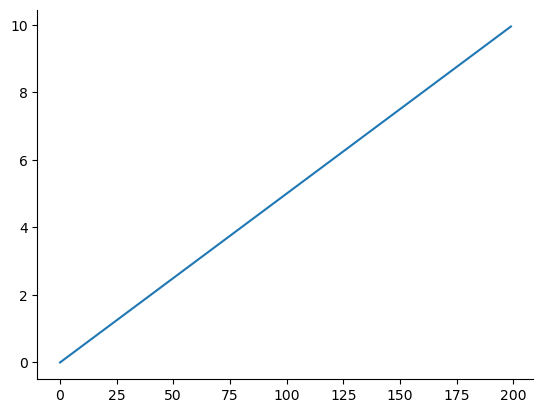

In [3]:
# gen trend components
trend = 0.05*t
plt.plot(t, trend)
sns.despine()

For a sine function $y = sin(x)$ the period is the length of the interval which the function completes a full cycle and begins to repeat $period_y = 2 \pi$.

For any sine function $f(x) = sin(bx)$, the period is $period_f = \frac{2\pi}{|b|}$

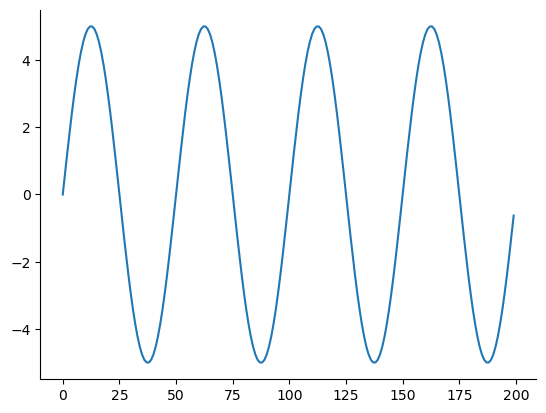

In [4]:
# gen seasonality component (sine wave with a period of 50)
seasonality = 5*np.sin(2*np.pi*t/50)
plt.plot(t, seasonality)

sns.despine()

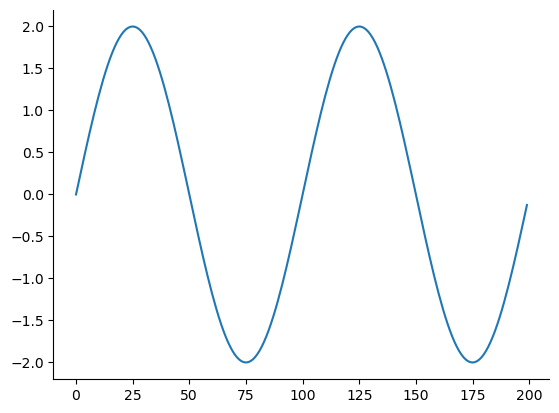

In [5]:
# gen cyclicality component (lower frequency sine wave)
cyclicality = 2*np.sin(2*np.pi*t/100)
plt.plot(t, cyclicality)
sns.despine()

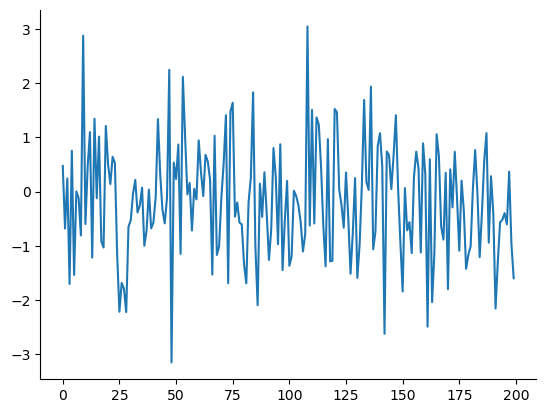

In [6]:
# gen random noise 
noise = np.random.normal(0,1,len(t))
plt.plot(t, noise)
sns.despine()

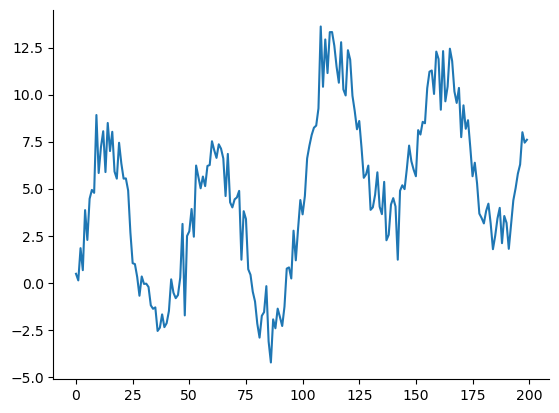

In [7]:
# combine components to create the time series 
time_series = trend + seasonality + cyclicality + noise
plt.plot(t, time_series)
sns.despine()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# decompose the time series
decompose = seasonal_decompose(time_series, model='additive', period=50)

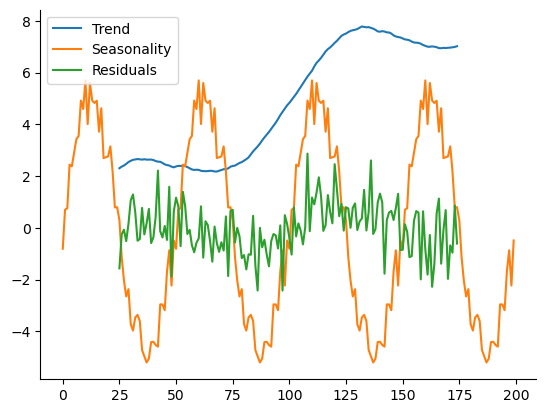

In [31]:
plt.plot(t, decompose.trend, label='Trend')
plt.plot(t, decompose.seasonal, label='Seasonality')
plt.plot(t, decompose.resid, label='Residuals')
plt.legend()
sns.despine()